In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Import the datasets:
- census data
- prescription data
- health services data
- overdose data

In [2]:
# import the demographic data (this is from the usa-zipcode python package)
CD = pd.read_csv('~/Desktop/new_insights/data_files/final_data_sets/massachusetts_city_census_data.csv', index_col = False)
PD = pd.read_csv('~/Desktop/new_insights/data_files/final_data_sets/massachusetts_city_prescriptions.csv', index_col = False)
HD = pd.read_csv('~/Desktop/new_insights/data_files/final_data_sets/massachusetts_city_health_services.csv', index_col = False)
OD = pd.read_csv('~/Desktop/new_insights/data_files/final_data_sets/massachusetts_city_overdoses.csv', index_col = False)
print(len(CD), len(PD), len(HD), len(OD))
type(CD)

303 303 303 352


pandas.core.frame.DataFrame

In [3]:
temp1 = pd.merge(CD, PD, on = 'City')
temp2 = pd.merge(temp1, HD, on = 'City')
temp3 = pd.merge(temp2, OD, on = 'City')

In [4]:
temp3.columns

Index(['City', 'Total Population', 'Area Land', 'Total Population: Male',
       'Total Population: Female', 'Total Population: Under 5 Years',
       'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years',
       'Total Population: 15 to 17 Years', 'Total Population: 18 to 24 Years',
       'Total Population: 25 to 34 Years', 'Total Population: 35 to 44 Years',
       'Total Population: 45 to 54 Years', 'Total Population: 55 to 64 Years',
       'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years',
       'Total Population: 85 Years and Over', 'Population 25 Years and Over:',
       'Population 25 Years and Over: < High School',
       'Population 25 Years and Over: High School Graduate Includes Equivalency',
       'Population 25 Years and Over: Some College',
       'Population 25 Years and Over: Bachelors Degree',
       'Population 25 Years and Over: Masters Degree',
       'Population 25 Years and Over: Professional School Degree',
       'Populati

In [5]:
df1 = pd.DataFrame()

df1['City'] = temp3['City']


### Keep City and Population
df1['City'] = temp3['City']
df1['Population'] = temp3['Total Population']
df1['Population Density'] = temp3['Total Population'] / temp3['Area Land']

### Convert Population Male / Female to Percentage
df1['Percent Male'] = temp3['Total Population: Male'] / temp3['Total Population']
df1['Percent Female'] = temp3['Total Population: Female'] / temp3['Total Population']

### Convert Bins of Age Counts to Percentage of Total Population in Age Bin
df1['Percent Age 5-9'] = temp3['Total Population: 5 to 9 Years'] / temp3['Total Population']
df1['Percent Age 10-14'] = temp3['Total Population: 10 to 14 Years'] / temp3['Total Population']
df1['Percent Age 15-17'] = temp3['Total Population: 15 to 17 Years'] / temp3['Total Population']
df1['Percent Age 18-24'] = temp3['Total Population: 18 to 24 Years'] / temp3['Total Population']
df1['Percent Age 25-34'] = temp3['Total Population: 25 to 34 Years'] / temp3['Total Population']
df1['Percent Age 35-44'] = temp3['Total Population: 35 to 44 Years'] / temp3['Total Population']
df1['Percent Age 45-54'] = temp3['Total Population: 45 to 54 Years'] / temp3['Total Population']
df1['Percent Age 55-64'] = temp3['Total Population: 55 to 64 Years'] / temp3['Total Population']
df1['Percent Age 65-74'] = temp3['Total Population: 65 to 74 Years'] / temp3['Total Population']
df1['Percent Age 75-84'] = temp3['Total Population: 75 to 84 Years'] / temp3['Total Population']
df1['Percent Age >85'] = temp3['Total Population: 85 Years and Over'] / temp3['Total Population']

### Convert Bins of Education to Percentage of Total Population in Education Bin (no dublicate degrees; e.g. BA + MS = MS)
df1['Percent Edu <High School'] = temp3['Population 25 Years and Over: < High School'] / temp3['Population 25 Years and Over:']
df1['Percent Edu High School'] = temp3['Population 25 Years and Over: High School Graduate Includes Equivalency'] / temp3['Population 25 Years and Over:']
df1['Percent Edu Bachelors'] = temp3['Population 25 Years and Over: Bachelors Degree'] / temp3['Population 25 Years and Over:']
df1['Percent Edu Masters'] = temp3['Population 25 Years and Over: Masters Degree'] / temp3['Population 25 Years and Over:']
df1['Percent Edu Progessional School'] = temp3['Population 25 Years and Over: Professional School Degree'] / temp3['Population 25 Years and Over:']
df1['Percent Edu Doctorate'] = temp3['Population 25 Years and Over: Doctorate Degree'] / temp3['Population 25 Years and Over:']

### Convert Number Employed / Unemployed to Percentages
df1['Percent Employed'] = temp3['Civilian Population in Labor Force 16 Years and Over: Employed'] / temp3['In Labor Force 16 Years and Over: Civilian']
df1['Percent Unemployed'] = temp3['Civilian Population in Labor Force 16 Years and Over: Unemployed'] / temp3['In Labor Force 16 Years and Over: Civilian']

### Convert Bins of Household Income Counts to Percentage of Total Population in Income Bin
df1['Household Income <10k'] = temp3['Households: < 10000'] / temp3['Households:']
df1['Household Income 10-14k'] = temp3['Households: 10000 to 14999'] / temp3['Households:']
df1['Household Income 15-19k'] = temp3['Households: 15000 to 19999'] / temp3['Households:']
df1['Household Income 20-24k'] = temp3['Households: 20000 to 24999'] / temp3['Households:']
df1['Household Income 25-29k'] = temp3['Households: 25000 to 29999'] / temp3['Households:']
df1['Household Income 30-34k'] = temp3['Households: 30000 to 34999'] / temp3['Households:']
df1['Household Income 35-39k'] = temp3['Households: 35000 to 39999'] / temp3['Households:']
df1['Household Income 40-44k'] = temp3['Households: 40000 to 44999'] / temp3['Households:']
df1['Household Income 45-49k'] = temp3['Households: 45000 to 49999'] / temp3['Households:']
df1['Household Income 50-59k'] = temp3['Households: 50000 to 59999'] / temp3['Households:']
df1['Household Income 60-74k'] = temp3['Households: 60000 to 74999'] / temp3['Households:']
df1['Household Income 75-99k'] = temp3['Households: 75000 to 99999'] / temp3['Households:']
df1['Household Income 100-124k'] = temp3['Households: 100000 to 124999'] / temp3['Households:']
df1['Household Income 125-149k'] = temp3['Households: 125000 to 149999'] / temp3['Households:']
df1['Household Income 150-199k'] = temp3['Households: 150000 to 199999'] / temp3['Households:']
df1['Household Income >200k'] = temp3['Households: > 200000'] / temp3['Households:']

### Keep Average Income As Is
df1['Mean Family Income'] = temp3['Average Family Income']
df1['Mean Nonfamily Income'] = temp3['Average Nonfamily Income']

### RX
df1['Prescribers'] = temp3['Prescribers'] / temp3['Total Population']
df1['Opioid Prescribers'] = temp3['Opioid Prescribers'] / temp3['Total Population']
df1['Opioid Claims'] = temp3['Opioid Claims'] / temp3['Total Population']
df1['Long Acting Opioid Claims'] = temp3['Long Acting Opioid Claims'] / temp3['Total Population']
df1['Overall Claims'] = temp3['Overall Claims'] / temp3['Total Population']

### Health Services
df1['SAMHSA Certified'] = temp3['SAMHSA Certified'] / temp3['Total Population']
df1['Buprenorphrine Physicians'] = temp3['Buprenorphrine Physicians'] / temp3['Total Population']
df1['EMHS Crisis Intervention'] = temp3['EMHS Crisis Intervention'] / temp3['Total Population']
df1['Transitional Housing'] = temp3['Transitional Housing'] / temp3['Total Population']
df1['Opioid Detoxification'] = temp3['Opioid Detoxification'] / temp3['Total Population']
df1['2018'] = temp3['2018']
df1['2018 Rate'] = temp3['2018'] / temp3['Total Population']


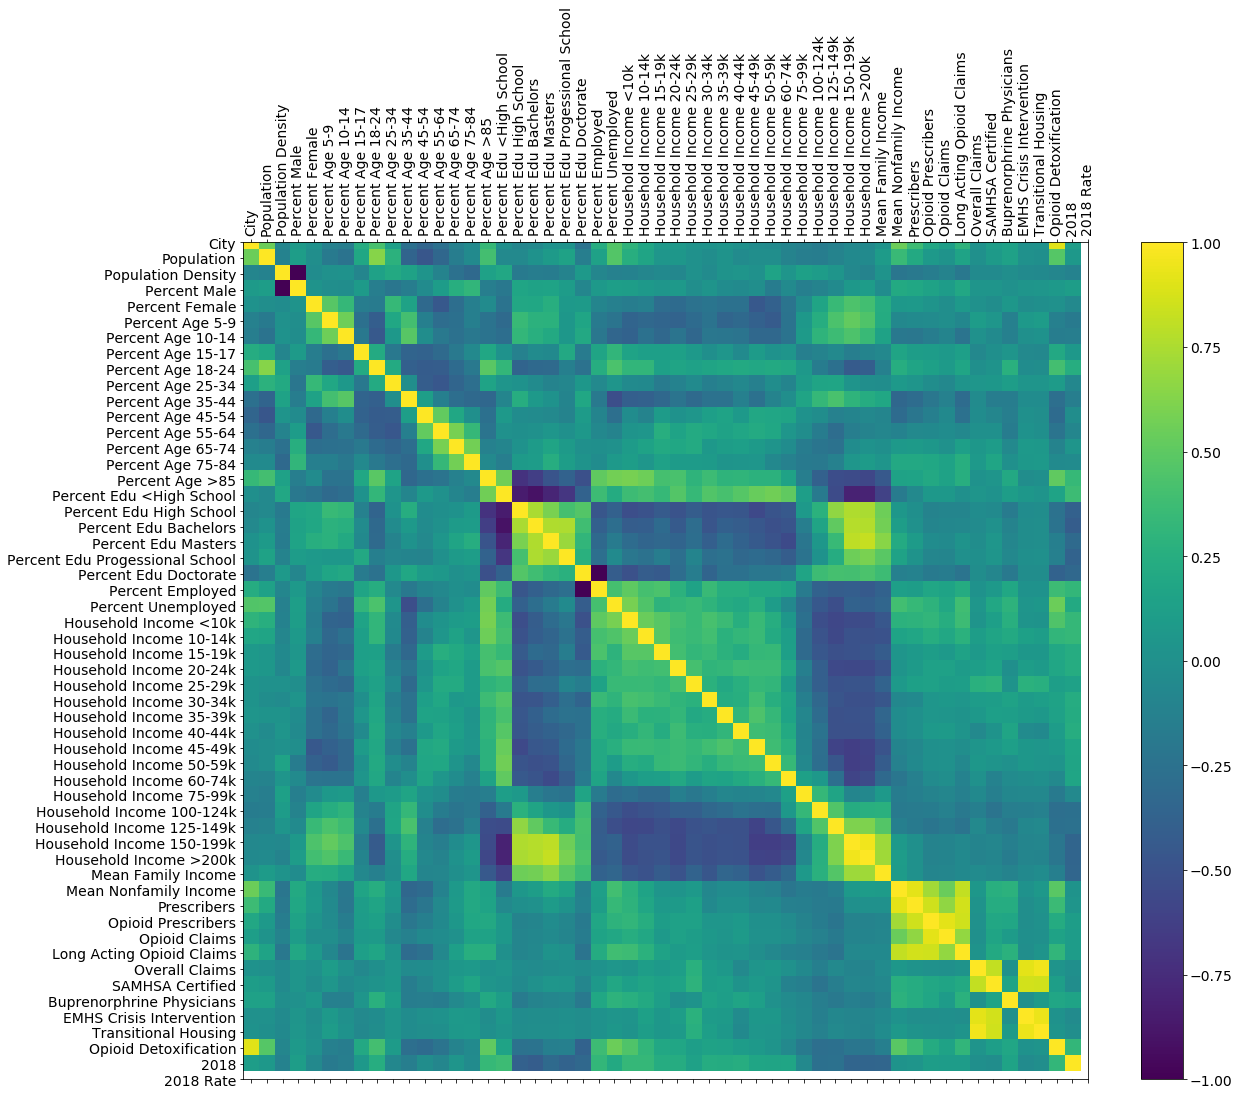

In [6]:
df = df1
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cmap = 'jet'
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [7]:
df1.head()

,City,Population,Population Density,Percent Male,Percent Female,Percent Age 5-9,Percent Age 10-14,Percent Age 15-17,Percent Age 18-24,Percent Age 25-34,...,Opioid Claims,Long Acting Opioid Claims,Overall Claims,SAMHSA Certified,Buprenorphrine Physicians,EMHS Crisis Intervention,Transitional Housing,Opioid Detoxification,2018,2018 Rate
0,Abington,16275,1685.601724,0.464332,0.535668,0.054747,0.057266,0.029370,0.104147,0.130200,...,0.093763,0.014624,3.531367,0.0,0.000061,0.000000,0.0,0.0,11,0.000676
1,Acton,23396,1184.003004,0.502436,0.497564,0.059113,0.092153,0.052744,0.062447,0.072833,...,0.057147,0.003932,3.368866,0.0,0.000000,0.000000,0.0,0.0,4,0.000171
2,Acushnet,10443,566.726174,0.492675,0.507325,0.061477,0.030930,0.035718,0.092502,0.110122,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2,0.000192
3,Adams,8211,333.908199,0.507855,0.492145,0.037389,0.056510,0.046523,0.069175,0.126172,...,0.260139,0.044818,5.413104,0.0,0.000000,0.000000,0.0,0.0,7,0.000853
4,Agawam,28748,1233.300939,0.478225,0.521775,0.050264,0.055134,0.043203,0.059691,0.111451,...,0.102685,0.020245,3.414846,0.0,0.000000,0.000035,0.0,0.0,12,0.000417


In [8]:
### Keep City and Population
df2 = pd.DataFrame()
df2['City'] = df1['City']
df2['Population'] = df1['Population']
df2['Population Density'] = df1['Population Density']

#### Keep Female
df2['Percent Female'] = df1['Percent Female']

#### Keeping all the Age Classes
df2['Percent Age 5-9'] = df1['Percent Age 5-9']
df2['Percent Age 10-14'] = df1['Percent Age 10-14'] 
df2['Percent Age 15-17'] = df1['Percent Age 15-17'] 
df2['Percent Age 18-24'] = df1['Percent Age 18-24'] 
df2['Percent Age 25-34'] = df1['Percent Age 25-34'] 
df2['Percent Age 35-44'] = df1['Percent Age 35-44'] 
df2['Percent Age 45-54'] = df1['Percent Age 45-54'] 
df2['Percent Age 55-64'] = df1['Percent Age 55-64'] 
df2['Percent Age 65-74'] = df1['Percent Age 65-74'] 
df2['Percent Age 75-84'] = df1['Percent Age 75-84'] 
df2['Percent Age >85'] = df1['Percent Age >85']

#### Group Education Levels
df2['Percent High School or Less'] = df1['Percent Edu <High School'] + df1['Percent Edu High School']
df2['Percent Professional School'] = df1['Percent Edu Progessional School']
df2['Percent Bachelors or Greater'] = df1['Percent Edu Bachelors'] + df1['Percent Edu Masters'] + df1['Percent Edu Doctorate']

#### Keep Unemployment
df2['Percent Unemployed'] = df1['Percent Unemployed']

#### Group Income Bins
df2['Household Income <25k'] = df1['Household Income <10k'] + df1['Household Income 10-14k'] + df1['Household Income 15-19k'] + df1['Household Income 20-24k']
df2['Household Income 25-49k'] = df1['Household Income 25-29k'] + df1['Household Income 30-34k'] + df1['Household Income 35-39k'] + df1['Household Income 40-44k'] + df1['Household Income 45-49k']
df2['Household Income 50-74k'] = df1['Household Income 50-59k'] + df1['Household Income 60-74k']
df2['Household Income 75-99k'] = df1['Household Income 75-99k']
df2['Household Income 100-124k'] = df1['Household Income 100-124k']
df2['Household Income 125-200k'] = df1['Household Income 125-149k'] + df1['Household Income 150-199k']
df2['Household Income >200k'] = df1['Household Income >200k']

#### Keep Average Income As Is
df2['Mean Family Income']  = df1['Mean Family Income'] 
df2['Mean Nonfamily Income'] = df1['Mean Nonfamily Income']

###
### RX
df2['Prescribers'] = df1['Prescribers']
df2['Opioid Prescribers'] = df1['Opioid Prescribers']
df2['Opioid Claims'] = df1['Opioid Claims']
df2['Long Acting Opioid Claims'] = df1['Long Acting Opioid Claims']
df2['Overall Claims'] = df1['Overall Claims']

## Health Services
df2['SAMHSA Certified'] = df1['SAMHSA Certified']
df2['Buprenorphrine Physicians'] = df1['Buprenorphrine Physicians']
df2['EMHS Crisis Intervention'] = df1['EMHS Crisis Intervention']
df2['Transitional Housing'] = df1['Transitional Housing']
df2['Opioid Detoxification'] = df1['Opioid Detoxification']
df2['2018'] = df1['2018']
df2['2018 Rate'] = df1['2018 Rate']


In [9]:
df2.head()

,City,Population,Population Density,Percent Female,Percent Age 5-9,Percent Age 10-14,Percent Age 15-17,Percent Age 18-24,Percent Age 25-34,Percent Age 35-44,...,Opioid Claims,Long Acting Opioid Claims,Overall Claims,SAMHSA Certified,Buprenorphrine Physicians,EMHS Crisis Intervention,Transitional Housing,Opioid Detoxification,2018,2018 Rate
0,Abington,16275,1685.601724,0.535668,0.054747,0.057266,0.029370,0.104147,0.130200,0.129524,...,0.093763,0.014624,3.531367,0.0,0.000061,0.000000,0.0,0.0,11,0.000676
1,Acton,23396,1184.003004,0.497564,0.059113,0.092153,0.052744,0.062447,0.072833,0.142546,...,0.057147,0.003932,3.368866,0.0,0.000000,0.000000,0.0,0.0,4,0.000171
2,Acushnet,10443,566.726174,0.507325,0.061477,0.030930,0.035718,0.092502,0.110122,0.109739,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2,0.000192
3,Adams,8211,333.908199,0.492145,0.037389,0.056510,0.046523,0.069175,0.126172,0.109122,...,0.260139,0.044818,5.413104,0.0,0.000000,0.000000,0.0,0.0,7,0.000853
4,Agawam,28748,1233.300939,0.521775,0.050264,0.055134,0.043203,0.059691,0.111451,0.123417,...,0.102685,0.020245,3.414846,0.0,0.000000,0.000035,0.0,0.0,12,0.000417


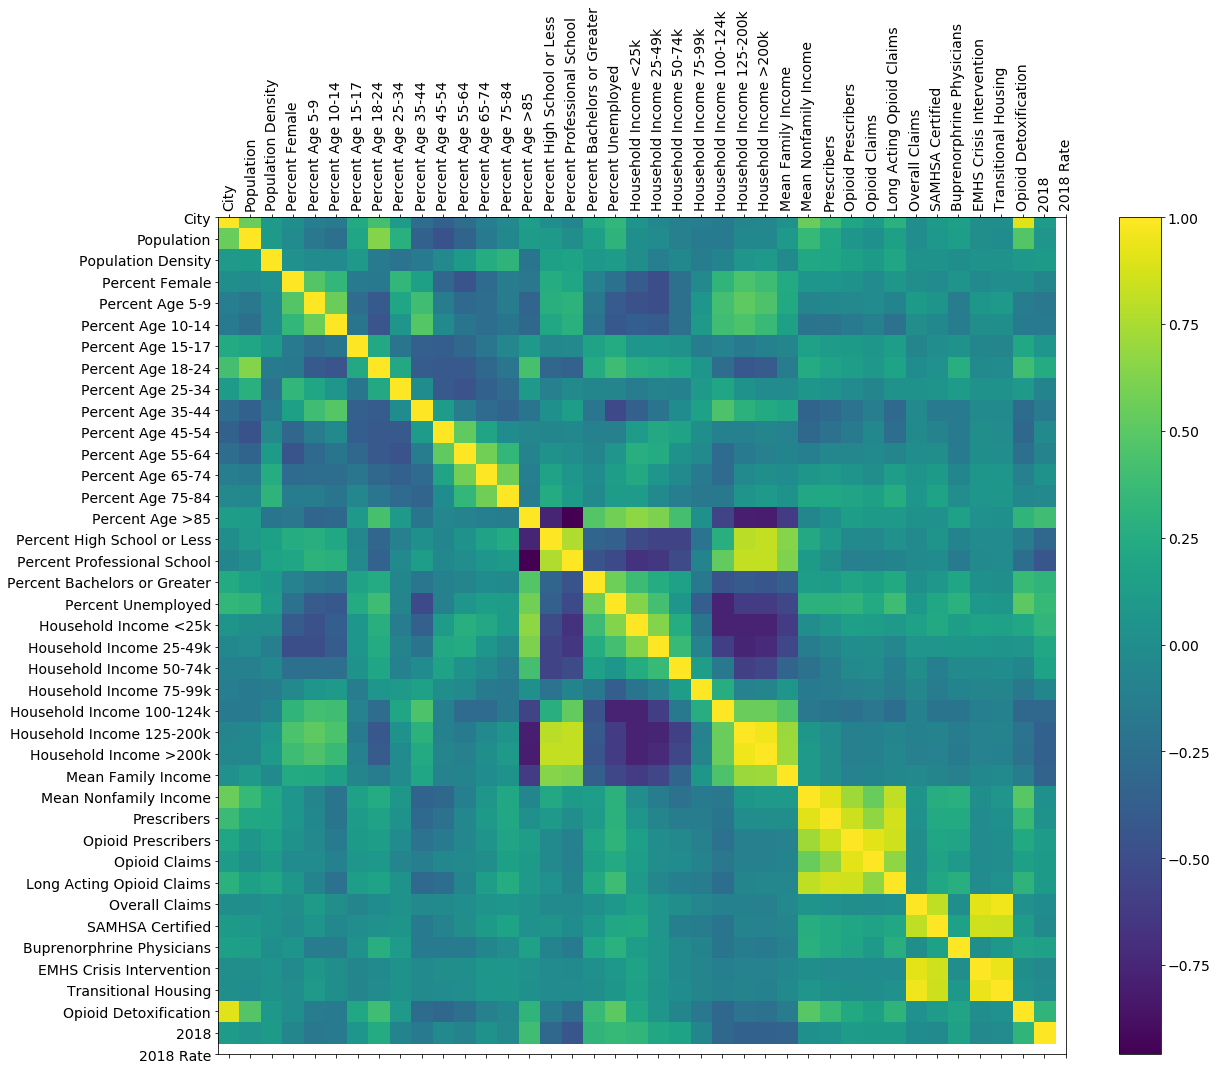

In [10]:
df = df2
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cmap = 'jet'
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [11]:
df.to_csv('~/Desktop/new_insights/data_files/final_data_sets/merged_massachusetts.csv', index = False)

# There is more to do...
# % opioid prescribers?
# % long acting claims... etc...


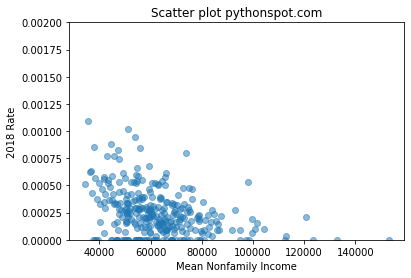

In [46]:
df = df2

x = 'Mean Nonfamily Income'
y = '2018 Rate'
plt.scatter(df[x],
            df[y],
            alpha = 0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel(x)
plt.ylabel(y)
plt.ylim(0,.002)
plt.show()